In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Specify file paths
grassland_path = r"C:\Users\brand\Downloads\Bird_Monitoring_Data_GRASSLAND.XLSX"
forest_path = r"C:\Users\brand\Downloads\Bird_Monitoring_Data_FOREST.XLSX"

# --- For Grassland Excel File ---
# Get all sheet names
grassland_sheets = pd.ExcelFile(grassland_path).sheet_names
print("Grassland Sheet Names:", grassland_sheets)

# Read all sheets into a dictionary
grassland_data = pd.read_excel(grassland_path, sheet_name=None)

# --- For Forest Excel File ---
# Get all sheet names
forest_sheets = pd.ExcelFile(forest_path).sheet_names
print("Forest Sheet Names:", forest_sheets)

# Read all sheets into a dictionary
forest_data = pd.read_excel(forest_path, sheet_name=None)

Grassland Sheet Names: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']
Forest Sheet Names: ['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [4]:
if len(grassland_sheets) == 1:
    print("Grassland file contains a single DataFrame.")
else:
    print(f"Grassland file contains {len(grassland_sheets)} DataFrames.")

Grassland file contains 11 DataFrames.


In [5]:
if len(forest_sheets) == 1:
    print("Forest file contains a single DataFrame.")
else:
    print(f"Forest file contains {len(forest_sheets)} DataFrames.")

Forest file contains 11 DataFrames.


In [6]:
# For grassland
for sheet_name, df in grassland_data.items():
    print(f"Grassland - Sheet: {sheet_name}, Shape: {df.shape}")

# For Forest
for sheet_name, df in forest_data.items():
    print(f"Forest - Sheet: {sheet_name}, Shape: {df.shape}")

Grassland - Sheet: ANTI, Shape: (3588, 29)
Grassland - Sheet: CATO, Shape: (0, 29)
Grassland - Sheet: CHOH, Shape: (0, 29)
Grassland - Sheet: GWMP, Shape: (0, 29)
Grassland - Sheet: HAFE, Shape: (117, 29)
Grassland - Sheet: MANA, Shape: (1811, 29)
Grassland - Sheet: MONO, Shape: (3015, 29)
Grassland - Sheet: NACE, Shape: (0, 29)
Grassland - Sheet: PRWI, Shape: (0, 29)
Grassland - Sheet: ROCR, Shape: (0, 29)
Grassland - Sheet: WOTR, Shape: (0, 29)
Forest - Sheet: ANTI, Shape: (333, 29)
Forest - Sheet: CATO, Shape: (805, 29)
Forest - Sheet: CHOH, Shape: (2202, 29)
Forest - Sheet: GWMP, Shape: (386, 29)
Forest - Sheet: HAFE, Shape: (422, 29)
Forest - Sheet: MANA, Shape: (465, 29)
Forest - Sheet: MONO, Shape: (370, 29)
Forest - Sheet: NACE, Shape: (684, 29)
Forest - Sheet: PRWI, Shape: (2463, 29)
Forest - Sheet: ROCR, Shape: (289, 29)
Forest - Sheet: WOTR, Shape: (127, 29)


In [7]:
combined_grassland_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in grassland_data.items()],
    ignore_index=True
)

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\1565856588.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_grassland_df = pd.concat(


In [8]:
combined_forest_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in forest_data.items()],
    ignore_index=True
)

In [9]:
combined_grassland_df.head(2)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Sheet
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,ANTI


In [10]:
combined_forest_df.head(2)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,Sheet
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,ANTI


In [11]:
combined_forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    8546 non-null   object        
 4   Location_Type                8546 non-null   object        
 5   Year                         8546 non-null   int64         
 6   Date                         8546 non-null   datetime64[ns]
 7   Start_Time                   8546 non-null   object        
 8   End_Time                     8546 non-null   object        
 9   Observer                     8546 non-null   object        
 10  Visit                        8546 non-null   int64         
 11  Interval_Length              8546 non-null 

In [12]:
# Add Source column to each before combining
combined_grassland_df['Source'] = 'Grassland'
combined_forest_df['Source'] = 'Forest'

# Final combined DataFrame
final_df = pd.concat([combined_grassland_df, combined_forest_df], ignore_index=True)

In [13]:
final_df.head(2)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Sheet,Source,Site_Name,NPSTaxonCode
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI,Grassland,NaN,NaN
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,ANTI,Grassland,NaN,NaN


In [14]:
final_df.tail(2)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Sheet,Source,Site_Name,NPSTaxonCode
17075,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,Forest,WOTR,94228.0
17076,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,Forest,WOTR,94228.0


In [15]:
#View null counts per column
print(final_df.isnull().sum())

Admin_Unit_Code                    0
Sub_Unit_Code                  16355
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          2
Distance                        1486
Flyover_Observed                   0
Sex                             5183
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       33
TaxonCode                       8548
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
Disturbance                        0
P

In [16]:
# Step 1: Check for duplicate rows
num_duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Step 2: Drop duplicates
final_df = final_df.drop_duplicates()
print("Duplicates removed successfully.")

# Step 3: Show final shape of data
print(f"Shape after removing duplicates: {final_df.shape}")

Number of duplicate rows: 1705
Duplicates removed successfully.
Shape after removing duplicates: (15372, 33)


In [17]:
#View % of null values
null_percent = (final_df.isnull().sum() / len(final_df)) * 100
print(null_percent.sort_values(ascending=False))

Sub_Unit_Code                  95.303149
TaxonCode                      55.607598
Previously_Obs                 55.594588
NPSTaxonCode                   44.405412
Site_Name                      44.405412
Sex                            33.717148
Distance                        4.482175
AcceptedTSN                     0.182149
ID_Method                       0.013011
Sheet                           0.000000
Initial_Three_Min_Cnt           0.000000
Source                          0.000000
Disturbance                     0.000000
Wind                            0.000000
PIF_Watchlist_Status            0.000000
Humidity                        0.000000
Temperature                     0.000000
Regional_Stewardship_Status     0.000000
Sky                             0.000000
Admin_Unit_Code                 0.000000
AOU_Code                        0.000000
Common_Name                     0.000000
Flyover_Observed                0.000000
Interval_Length                 0.000000
Visit           

In [18]:
#Drop columns with too many nulls (e.g., >50%)
columns_to_drop = [
    'Sub_Unit_Code',
    'Previously_Obs',
    'TaxonCode',
    'NPSTaxonCode',
    'Site_Name',
    'AcceptedTSN'
]
final_df.drop(columns=columns_to_drop, inplace=True)

In [19]:
final_df.shape

(15372, 27)

In [21]:
import re

def extract_avg_wind_speed(text):
    if isinstance(text, str):
        match = re.search(r"\((\d+)-(\d+)\s*mph\)", text)
        if match:
            low = int(match.group(1))
            high = int(match.group(2))
            return (low + high) / 2
    return None  # for missing or malformed entries

final_df['Wind_Speed_mph'] = final_df['Wind'].apply(extract_avg_wind_speed)

In [22]:
final_df['Wind_Speed_mph']

0        5.5
1        5.5
2        5.5
3        5.5
4        5.5
        ... 
17072    2.0
17073    2.0
17074    2.0
17075    2.0
17076    2.0
Name: Wind_Speed_mph, Length: 15372, dtype: float64

In [23]:
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')
final_df['Temperature'] = pd.to_numeric(final_df['Temperature'], errors='coerce')
final_df['Humidity'] = pd.to_numeric(final_df['Humidity'], errors='coerce')

In [24]:
# Identify numeric columns
numeric_cols = final_df.select_dtypes(include='number').columns
print(numeric_cols)

Index(['Temperature', 'Humidity', 'Wind_Speed_mph'], dtype='object')


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15372 entries, 0 to 17076
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              15372 non-null  object        
 1   Plot_Name                    15372 non-null  object        
 2   Location_Type                15372 non-null  object        
 3   Year                         15372 non-null  object        
 4   Date                         15372 non-null  datetime64[ns]
 5   Start_Time                   15372 non-null  object        
 6   End_Time                     15372 non-null  object        
 7   Observer                     15372 non-null  object        
 8   Visit                        15372 non-null  object        
 9   Interval_Length              15372 non-null  object        
 10  ID_Method                    15370 non-null  object        
 11  Distance                     14683 non-null  o

In [26]:
final_df.describe()

,Date,Temperature,Humidity,Wind_Speed_mph
count,15372,15372.000000,15372.000000,11162.000000
mean,2018-06-13 17:45:11.943793920,22.493826,74.159335,3.252777
min,2018-05-07 00:00:00,11.000000,7.300000,2.000000
25%,2018-05-24 00:00:00,19.700001,68.000000,2.000000
50%,2018-06-14 00:00:00,22.200001,76.599998,2.000000
75%,2018-07-03 00:00:00,25.000000,83.400002,5.500000
max,2018-07-19 00:00:00,37.299999,98.800003,10.000000
std,NaN,4.193138,12.168509,1.998208


In [27]:
#Define functions
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

In [28]:
numeric_cols = ['Temperature', 'Humidity', 'Wind_Speed_mph']

for col in numeric_cols:
    outliers = detect_outliers_iqr(final_df, col)
    print(f"{col}: {len(outliers)} outliers")

Temperature: 281 outliers
Humidity: 304 outliers
Wind_Speed_mph: 0 outliers


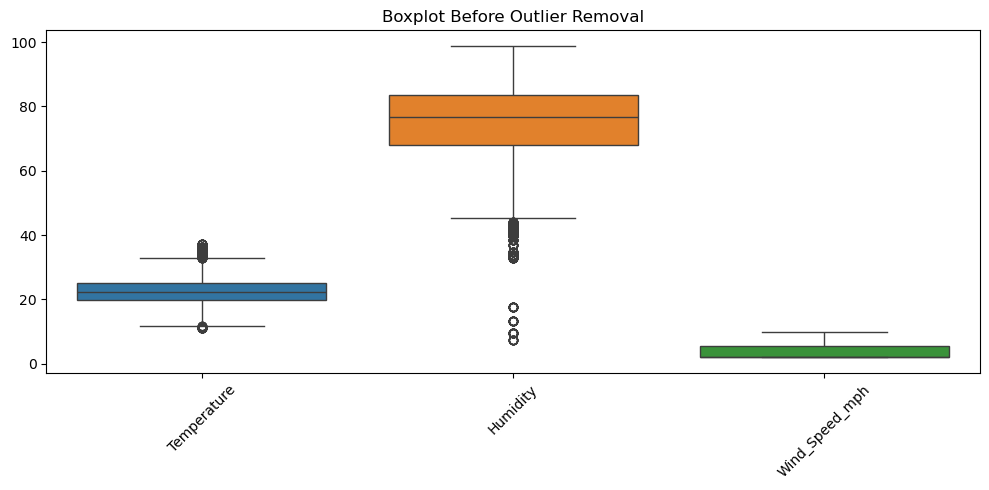

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[numeric_cols])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Before removing
plot_boxplots(final_df, "Boxplot Before Outlier Removal")

In [30]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)  # caps values outside [lower, upper]
    return df

In [31]:
for col in ['Temperature', 'Humidity', 'Wind_Speed_mph']:
    final_df = cap_outliers(final_df, col)

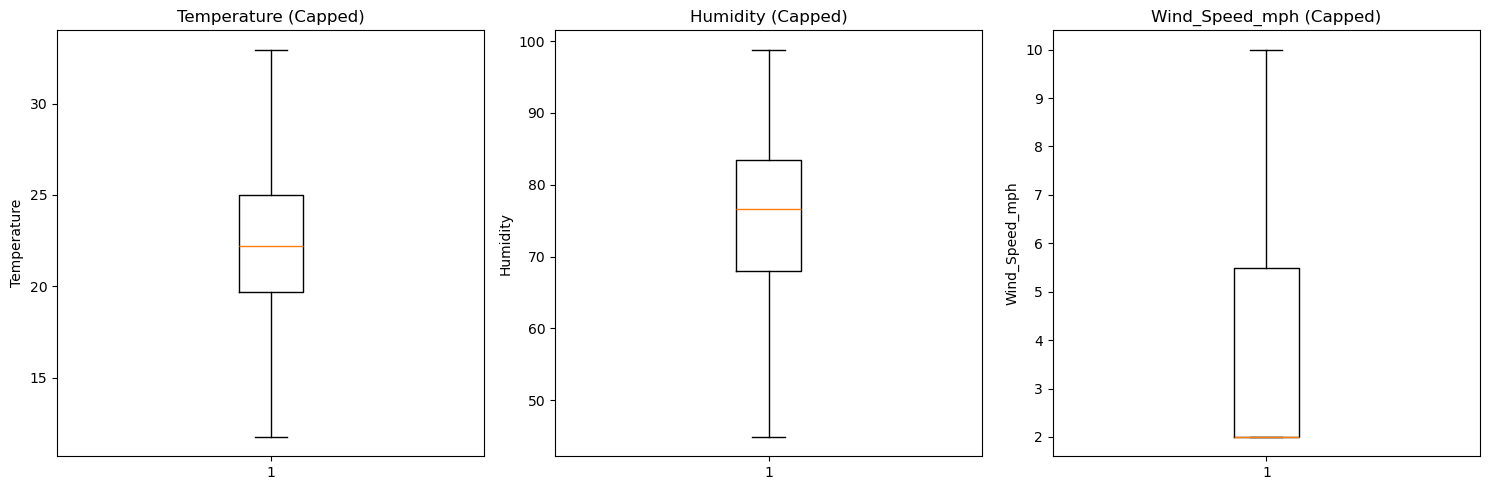

In [32]:
import matplotlib.pyplot as plt

cols = ['Temperature', 'Humidity', 'Wind_Speed_mph']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(cols):
    axes[i].boxplot(final_df[col].dropna())
    axes[i].set_title(f'{col} (Capped)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15372 entries, 0 to 17076
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              15372 non-null  object        
 1   Plot_Name                    15372 non-null  object        
 2   Location_Type                15372 non-null  object        
 3   Year                         15372 non-null  object        
 4   Date                         15372 non-null  datetime64[ns]
 5   Start_Time                   15372 non-null  object        
 6   End_Time                     15372 non-null  object        
 7   Observer                     15372 non-null  object        
 8   Visit                        15372 non-null  object        
 9   Interval_Length              15372 non-null  object        
 10  ID_Method                    15370 non-null  object        
 11  Distance                     14683 non-null  o

In [102]:
import os
# Define folder path and filename
folder = 'birds'  # folder name
filename = 'final_df.csv'  # file name

# Create the folder if it doesn't exist
os.makedirs(folder, exist_ok=True)

# Save the DataFrame as a CSV
final_df.to_csv(os.path.join(folder, filename), index=False)

print("Data saved successfully!")

Data saved successfully!


A. Temporal Analysis
1. Bird Observations by Year and Month

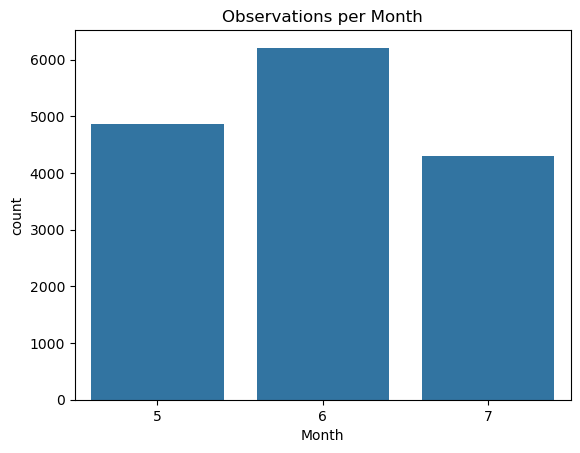

In [40]:
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Season'] = final_df['Month'].map({12:'Winter', 1:'Winter', 2:'Winter',
                                3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer',
                                9:'Autumn', 10:'Autumn', 11:'Autumn'})

# Plot observations by month
sns.countplot(data=final_df, x='Month')
plt.title("Observations per Month")
plt.show()

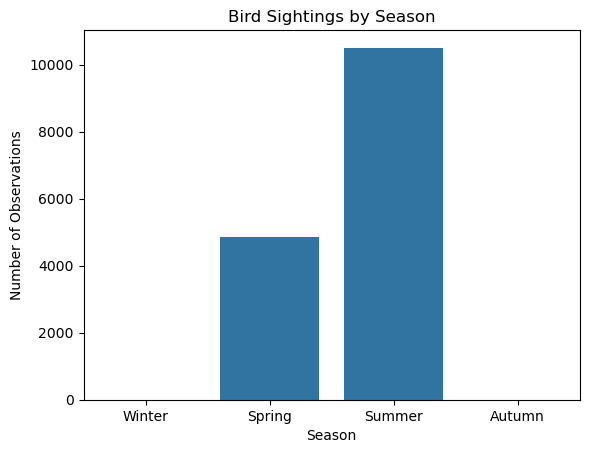

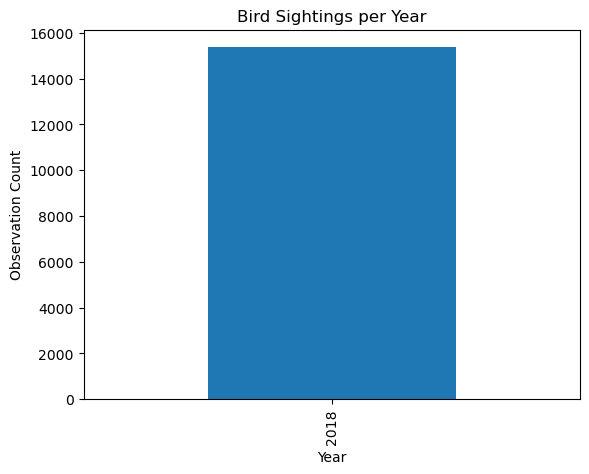

In [41]:
# Plot count of sightings per season
sns.countplot(data=final_df, x='Season', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title("Bird Sightings by Season")
plt.ylabel("Number of Observations")
plt.show()

# Plot number of observations per year
final_df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Bird Sightings per Year")
plt.xlabel("Year")
plt.ylabel("Observation Count")
plt.show()

2. Observation Time Distribution

Start_Hour
5     1288
6     3837
7     4014
8     3196
9     2016
10    1021
Name: count, dtype: int64


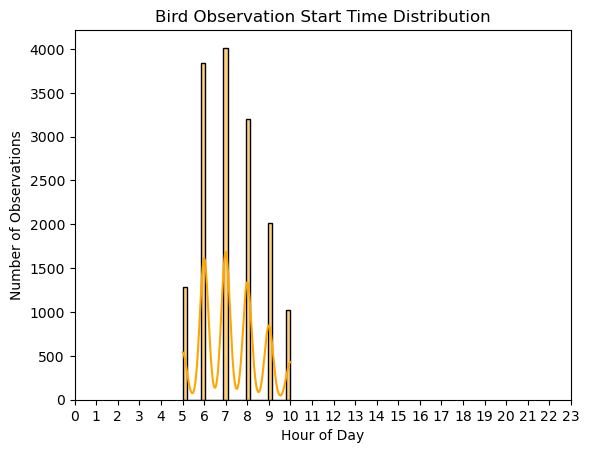

In [42]:
final_df['Start_Time'] = pd.to_datetime(final_df['Start_Time'], format='%H:%M:%S', errors='coerce')
final_df['Start_Hour'] = final_df['Start_Time'].dt.hour


final_df['Start_Time'] = pd.to_datetime(final_df['Start_Time'], errors='coerce')
final_df['Start_Hour'] = final_df['Start_Time'].dt.hour
hour_counts = final_df['Start_Hour'].value_counts().sort_index()
print(hour_counts)
sns.histplot(final_df['Start_Hour'].dropna(), bins=24, kde=True, color='orange')
plt.title("Bird Observation Start Time Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.xticks(range(0, 24))
plt.show()

Number of observations by End Hour:
End_Hour
5      691
6     3735
7     4068
8     3284
9     2323
10    1271
Name: count, dtype: int64


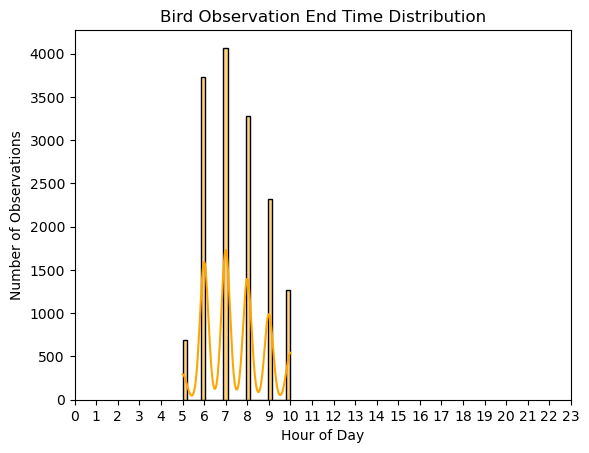

In [43]:
final_df['End_Time'] = pd.to_datetime(final_df['End_Time'], format='%H:%M:%S', errors='coerce')
final_df['End_Hour'] = final_df['End_Time'].dt.hour
end_hour_counts = final_df['End_Hour'].value_counts().sort_index()

# Print the counts
print("Number of observations by End Hour:")
print(end_hour_counts)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_df['End_Hour'].dropna(), bins=24, kde=True, color='orange')
plt.title("Bird Observation End Time Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.xticks(range(0, 24))
plt.show()

B. Spatial Analysis
1. By Location Type


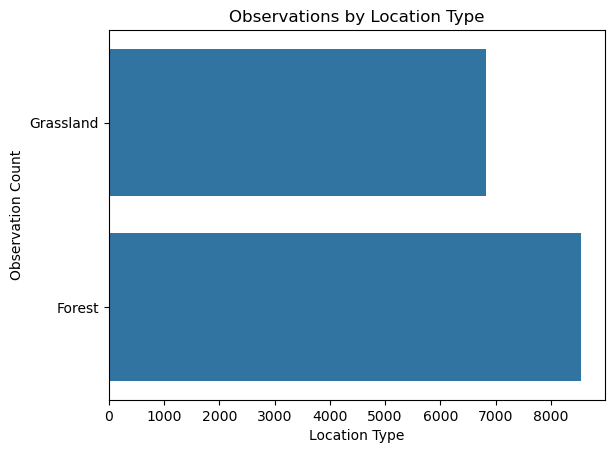

In [44]:
sns.countplot(y='Location_Type', data=final_df)
plt.title("Observations by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Observation Count")
plt.show()

Location_Type
Forest       108
Grassland    107
Name: Scientific_Name, dtype: int64


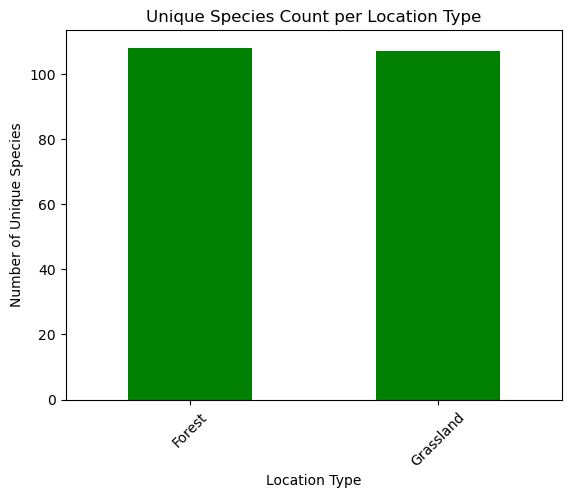

In [45]:
#Unique Species per Location Type
species_per_location = final_df.groupby('Location_Type')['Scientific_Name'].nunique().sort_values(ascending=False)
print(species_per_location)
species_per_location.plot(kind='bar', color='green')
plt.title("Unique Species Count per Location Type")
plt.xlabel("Location Type")
plt.ylabel("Number of Unique Species")
plt.xticks(rotation=45)
plt.show()

2.By Plot Name (Top 10)

Plot_Name
ANTI-0163    54
ANTI-0028    52
HAFE-0067    52
MANA-0048    50
ANTI-0016    49
ANTI-0034    48
MONO-0037    48
ANTI-0184    48
MONO-0057    48
ANTI-0161    48
Name: count, dtype: int64


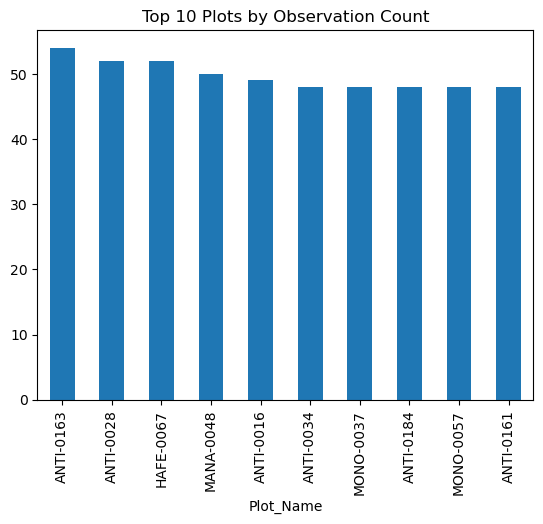

In [46]:
top_plots = final_df['Plot_Name'].value_counts().head(10)
print(top_plots)
top_plots.plot(kind='bar')
plt.title("Top 10 Plots by Observation Count")
plt.show()

Plot_Name
ANTI-0105    27
MONO-0057    27
MANA-0047    27
MANA-0048    26
MONO-0076    26
MONO-0066    26
CHOH-0812    26
MONO-0085    26
ANTI-0160    25
ANTI-0034    25
Name: Scientific_Name, dtype: int64


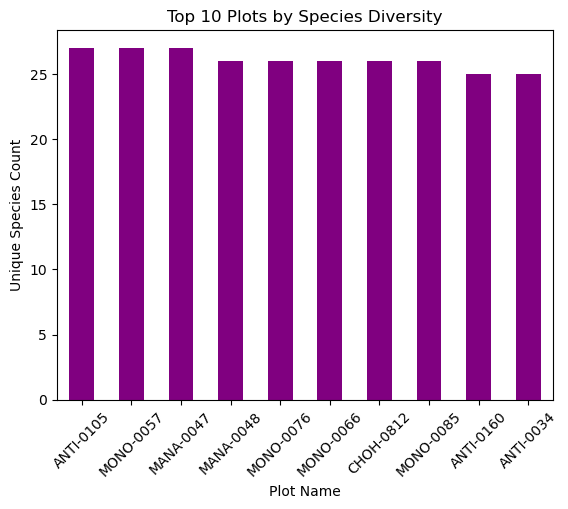

In [47]:
#Species Diversity per Plot
plot_diversity =final_df.groupby('Plot_Name')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)
print(plot_diversity)
plot_diversity.plot(kind='bar', color='purple')
plt.title("Top 10 Plots by Species Diversity")
plt.xlabel("Plot Name")
plt.ylabel("Unique Species Count")
plt.xticks(rotation=45)
plt.show()

C. Species Analysis
1.Diversity Metrics

Unique species observed: 127


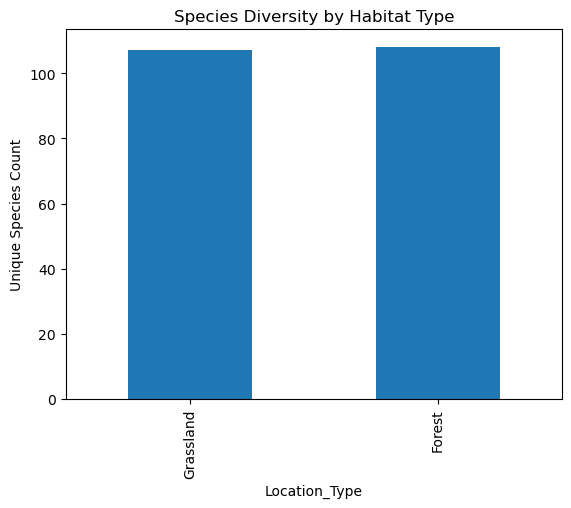

In [48]:
species_count =final_df['Scientific_Name'].nunique()
print("Unique species observed:", species_count)

final_df.groupby('Location_Type')['Scientific_Name'].nunique().sort_values().plot(kind='bar')
plt.title("Species Diversity by Habitat Type")
plt.ylabel("Unique Species Count")
plt.show()

2.Activity Patterns

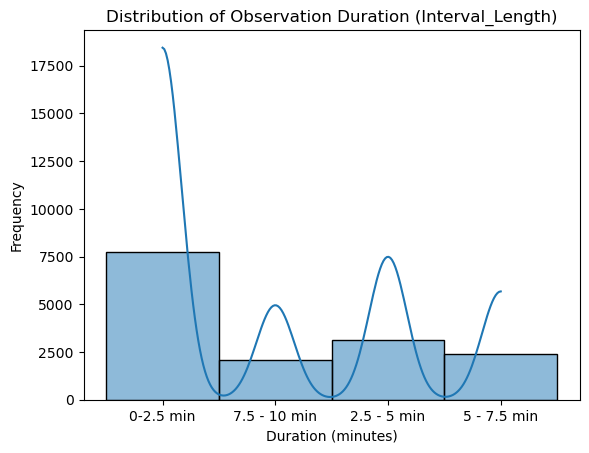

In [49]:
#interval length
sns.histplot(final_df['Interval_Length'], bins=20, kde=True)
plt.title("Distribution of Observation Duration (Interval_Length)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

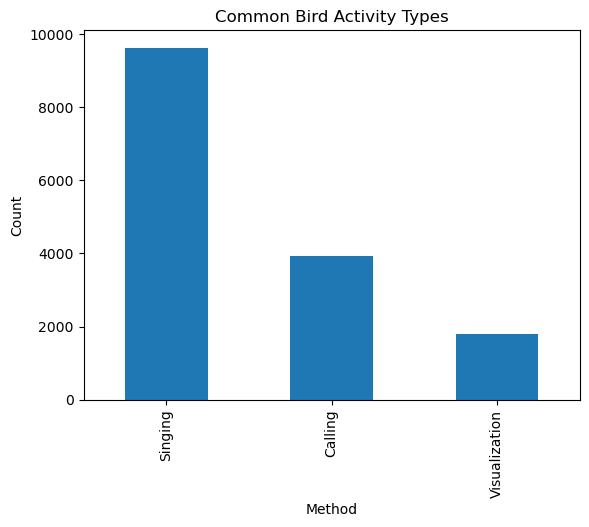

In [50]:
final_df['ID_Method'].value_counts().plot(kind='bar')
plt.title("Common Bird Activity Types")
plt.xlabel("Method")
plt.ylabel("Count")
plt.show()

3.Sex Ratio

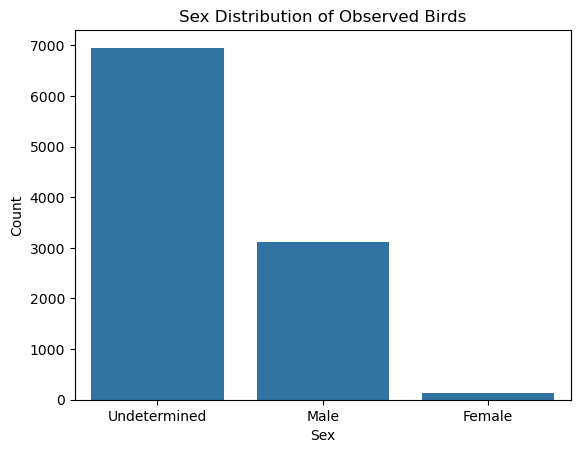

In [51]:
sns.countplot(data=final_df, x='Sex', order=final_df['Sex'].value_counts().index)
plt.title("Sex Distribution of Observed Birds")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

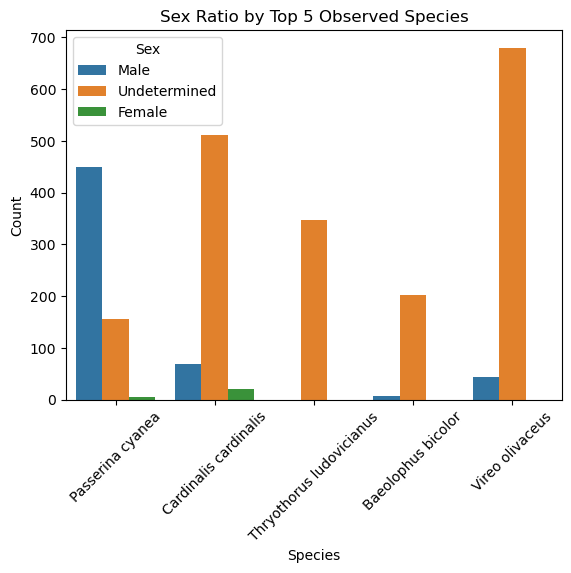

In [52]:
#Sex Ratio by Species
top_species = final_df['Scientific_Name'].value_counts().head(5).index
subset = final_df[final_df['Scientific_Name'].isin(top_species)]

sns.countplot(data=subset, x='Scientific_Name', hue='Sex')
plt.title("Sex Ratio by Top 5 Observed Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

 D. Environmental Conditions

1.weather correlation

In [ ]:
# Correlation Heatmap
import re
import numpy as np

def convert_distance_to_numeric(dist):
    if pd.isna(dist):
        return np.nan
    numbers = re.findall(r'\d+', dist)
    if len(numbers) == 1:
        return float(numbers[0])
    elif len(numbers) == 2:
        return (float(numbers[0]) + float(numbers[1])) / 2
    else:
        return np.nan

final_df['Distance_Num'] = final_df['Distance'].apply(convert_distance_to_numeric)

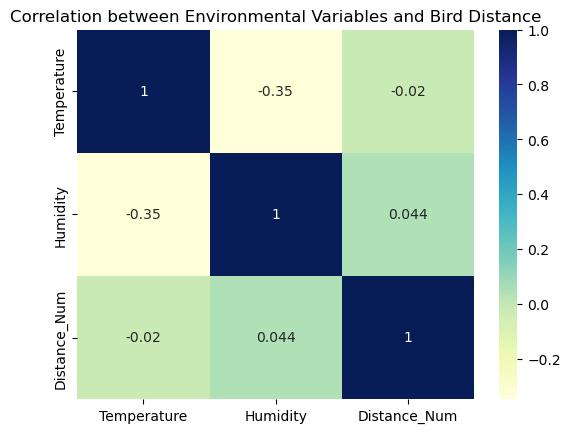

In [54]:
numeric_cols = ['Temperature', 'Humidity', 'Distance_Num']

corr = final_df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation between Environmental Variables and Bird Distance")
plt.show()

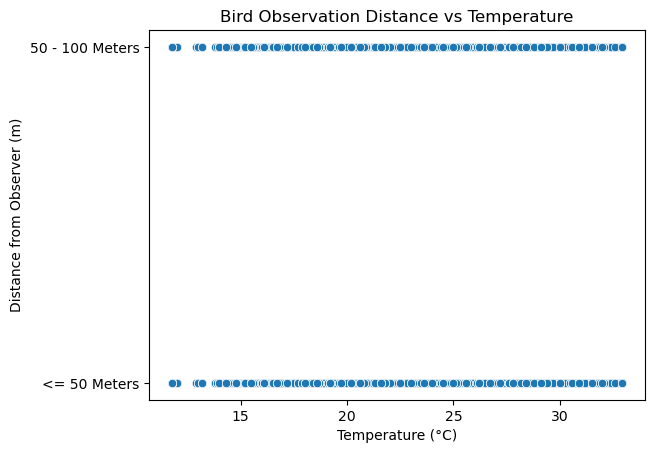

In [55]:
#Temperature vs Distance of Birds
sns.scatterplot(data=final_df, x='Temperature', y='Distance')
plt.title("Bird Observation Distance vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Distance from Observer (m)")
plt.show()

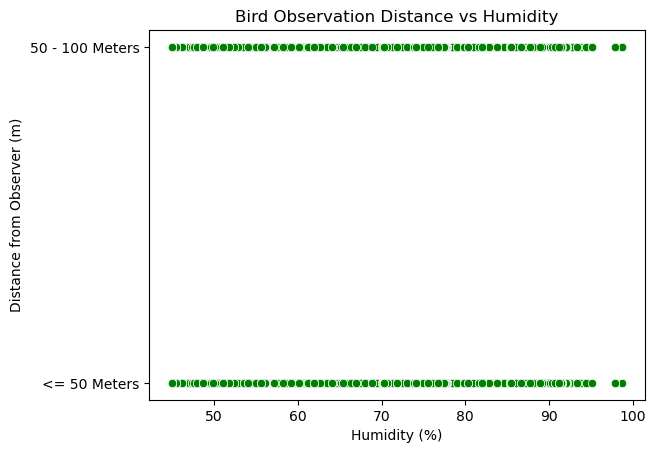

In [56]:
# Humidity vs Distance
sns.scatterplot(data=final_df, x='Humidity', y='Distance', color='green')
plt.title("Bird Observation Distance vs Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Distance from Observer (m)")
plt.show()

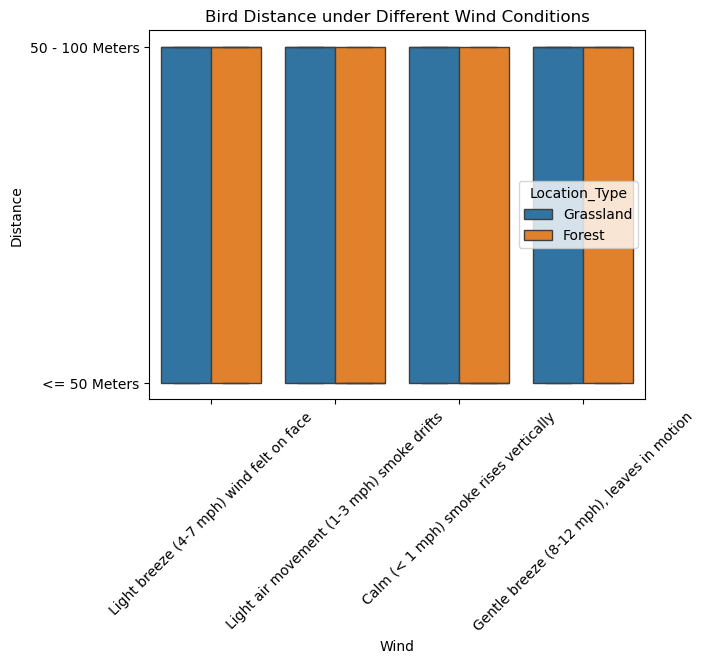

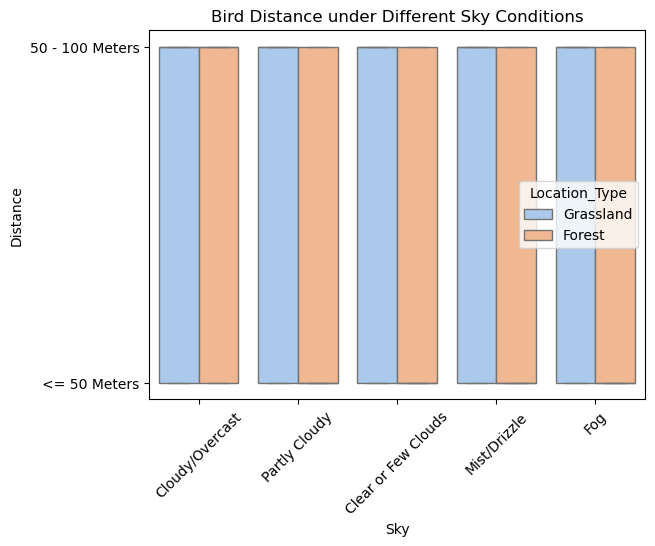

In [57]:
# Wind and Sky Impact
sns.boxplot(data=final_df, x='Wind', y='Distance',hue='Location_Type')
plt.title("Bird Distance under Different Wind Conditions")
plt.xlabel("Wind")
plt.ylabel("Distance")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=final_df, x='Sky', y='Distance',hue='Location_Type', palette='pastel')
plt.title("Bird Distance under Different Sky Conditions")
plt.xlabel("Sky")
plt.ylabel("Distance")
plt.xticks(rotation=45)
plt.show()


2.Disturbance Effec

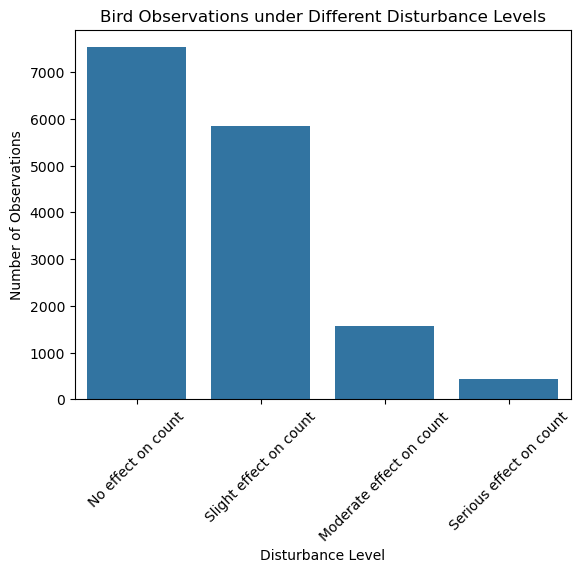

In [58]:
sns.countplot(data=final_df, x='Disturbance', order=final_df['Disturbance'].value_counts().index)
plt.title("Bird Observations under Different Disturbance Levels")
plt.xlabel("Disturbance Level")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.show()

E. Distance and Behavior

1.Distance Analysis

In [59]:
print(final_df['Distance'].unique())

['50 - 100 Meters' '<= 50 Meters' nan]


In [ ]:
import numpy as np
import re

def convert_distance_to_num(dist_str):
    if pd.isnull(dist_str):
        return np.nan
    numbers = re.findall(r'\d+', dist_str)
    if len(numbers) == 0:
        return np.nan
    elif len(numbers) == 1:
        return float(numbers[0])
    else:
        nums = list(map(float, numbers))
        return np.mean(nums)

final_df['Distance_num'] = final_df['Distance'].apply(convert_distance_to_num)

                           mean  median  count
Scientific_Name                               
Setophaga coronata         50.0    50.0      3
Vermivora cyanoptera       50.0    50.0      1
Passerculus sandwichensis  50.0    50.0      1
Butorides virescens        50.0    50.0      1
Empidonax minimus          50.0    50.0      1
Setophaga tigrina          50.0    50.0      6
Setophaga dominica         50.0    50.0      3
Tyrannidae                 50.0    50.0      2
Archilochus colubris       50.0    50.0      2
Anas platyrhynchos         50.0    50.0      3
                          mean  median  count
Scientific_Name                              
Falco sparverius          75.0    75.0      3
Empidonax traillii        75.0    75.0      2
Corvus caurinus           75.0    75.0      1
Columba livia             75.0    75.0      2
Charadrius vociferus      75.0    75.0     11
Ardeola bacchus           75.0    75.0      1
Setophaga pensylvanica    75.0    75.0      1
Zonotrichia albicollis

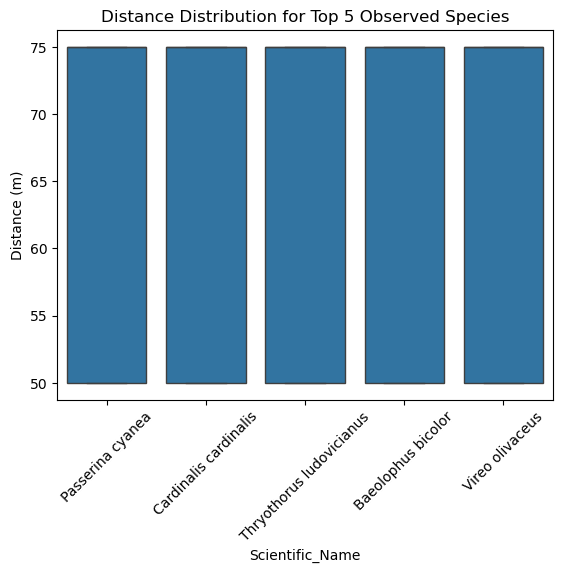

In [61]:
distance_stats = final_df.groupby('Scientific_Name')['Distance_num'].agg(['mean', 'median', 'count']).sort_values(by='mean')
print(distance_stats.head(10))  # Closest species
print(distance_stats.tail(10))  # Farthest species

top_species = final_df['Scientific_Name'].value_counts().head(5).index
sns.boxplot(data=final_df[final_df['Scientific_Name'].isin(top_species)], x='Scientific_Name', y='Distance_num')
plt.title("Distance Distribution for Top 5 Observed Species")
plt.ylabel("Distance (m)")
plt.xticks(rotation=45)
plt.show()

2.Flyover Frequency

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\1134349002.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='Flyover_Observed', palette='Set2')


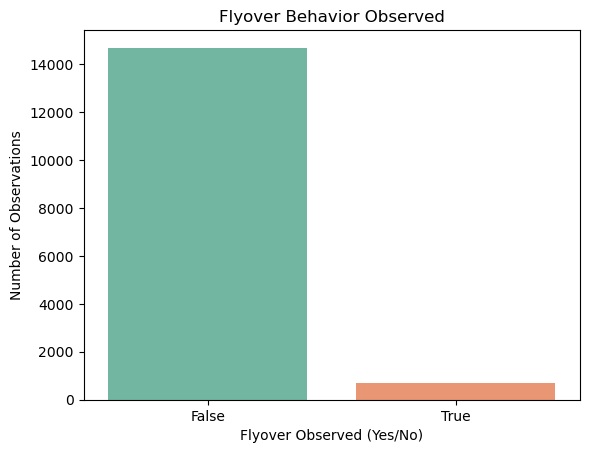

In [63]:
sns.countplot(data=final_df, x='Flyover_Observed', palette='Set2')
plt.title("Flyover Behavior Observed")
plt.xlabel("Flyover Observed (Yes/No)")
plt.ylabel("Number of Observations")
plt.show()

In [64]:
print(final_df['Flyover_Observed'].unique())

[False True]


In [65]:
final_df['Flyover_Observed'] = final_df['Flyover_Observed'].astype(str).str.strip().str.lower()

In [66]:
print(final_df['Flyover_Observed'].value_counts())

Flyover_Observed
false    14683
true       689
Name: count, dtype: int64


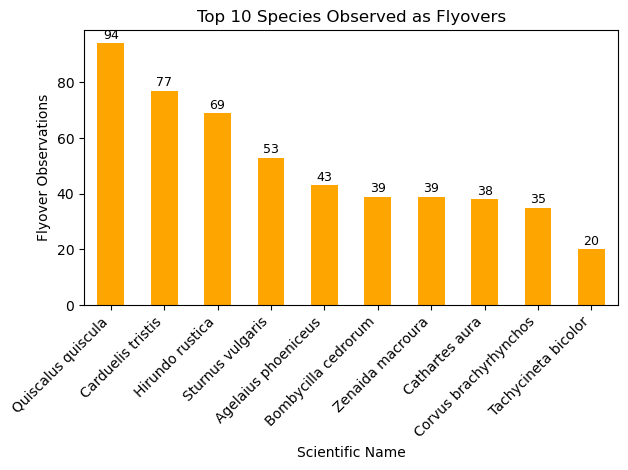

In [67]:
# Filter only rows with 'true'
flyover_df = final_df[final_df['Flyover_Observed'] == 'true']

# Get top 10 flyover species
flyover_rate = flyover_df['Scientific_Name'].value_counts().head(10)

# Plot
ax = flyover_rate.plot(kind='bar', color='orange')
plt.title("Top 10 Species Observed as Flyovers")
plt.xlabel("Scientific Name")
plt.ylabel("Flyover Observations")
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, v in enumerate(flyover_rate.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

F. Observer Trends

1.observer bias

Observer
Elizabeth Oswald    5763
Kimberly Serno      5346
Brian Swimelar      4263
Name: count, dtype: int64


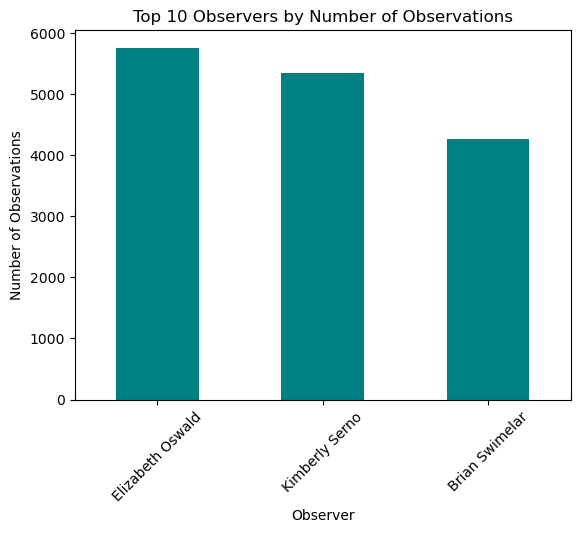

In [68]:
observer_counts =final_df['Observer'].value_counts().head(10)
print(observer_counts)
observer_counts.plot(kind='bar', color='teal')
plt.title("Top 10 Observers by Number of Observations")
plt.xlabel("Observer")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.show()

Observer
Elizabeth Oswald    120
Kimberly Serno       91
Brian Swimelar       84
Name: Scientific_Name, dtype: int64


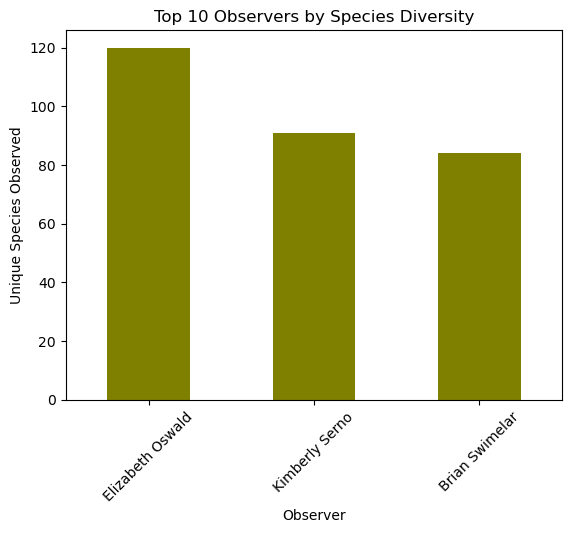

In [69]:
species_by_observer = final_df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)
print(species_by_observer)
species_by_observer.plot(kind='bar', color='olive')
plt.title("Top 10 Observers by Species Diversity")
plt.xlabel("Observer")
plt.ylabel("Unique Species Observed")
plt.xticks(rotation=45)
plt.show()

2.Visit Patterns

Visit
1    6856
2    6410
3    2106
Name: count, dtype: int64


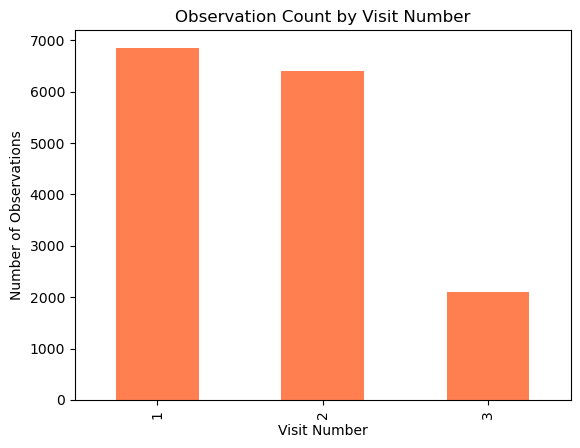

In [70]:
visit_counts = final_df['Visit'].value_counts().sort_index()
print(visit_counts)
visit_counts.plot(kind='bar', color='coral')
plt.title("Observation Count by Visit Number")
plt.xlabel("Visit Number")
plt.ylabel("Number of Observations")
plt.show()

Visit
1    119
2    100
3     74
Name: Scientific_Name, dtype: int64


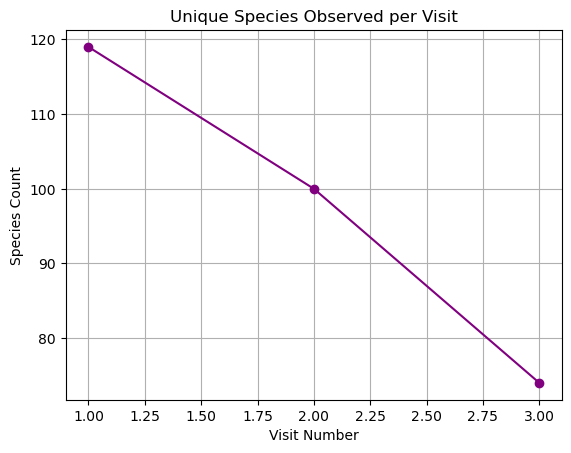

In [71]:
species_per_visit =final_df.groupby('Visit')['Scientific_Name'].nunique()
print(species_per_visit)
species_per_visit.plot(marker='o', linestyle='-', color='purple')
plt.title("Unique Species Observed per Visit")
plt.xlabel("Visit Number")
plt.ylabel("Species Count")
plt.grid(True)
plt.show()

G. Conservation Insights

1.Watchlist Trends

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\2707822334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, y='PIF_Watchlist_Status', order=final_df['PIF_Watchlist_Status'].value_counts().index, palette='Set2')


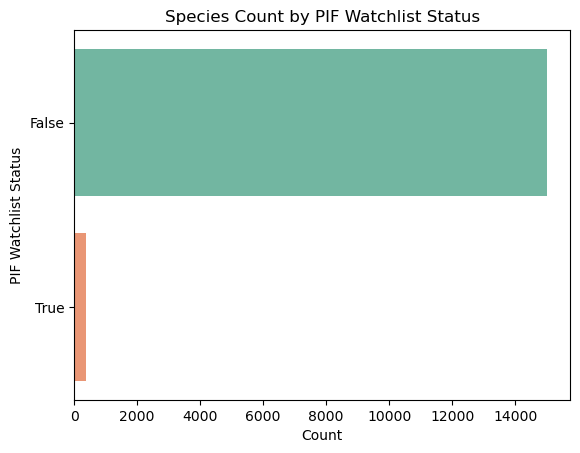

In [72]:
sns.countplot(data=final_df, y='PIF_Watchlist_Status', order=final_df['PIF_Watchlist_Status'].value_counts().index, palette='Set2')

plt.title("Species Count by PIF Watchlist Status")
plt.xlabel("Count")
plt.ylabel("PIF Watchlist Status")
plt.show()

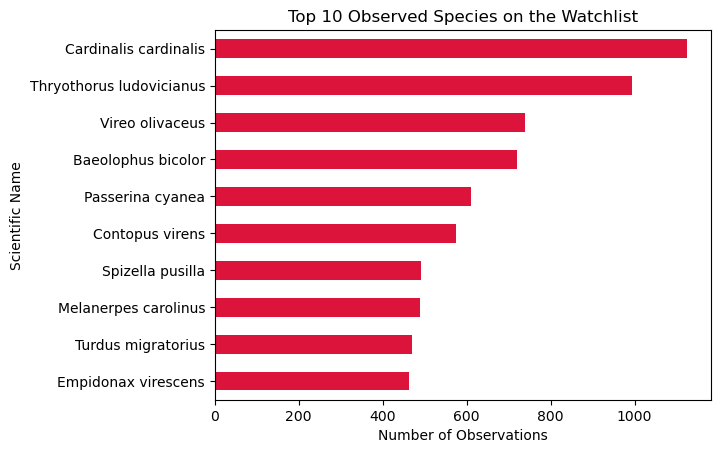

In [73]:
#Top Watchlist Species Observed
watchlist_species = final_df[final_df['PIF_Watchlist_Status'] != 'None']['Scientific_Name'].value_counts().head(10)

watchlist_species.plot(kind='barh', color='crimson')
plt.title("Top 10 Observed Species on the Watchlist")
plt.xlabel("Number of Observations")
plt.ylabel("Scientific Name")
plt.gca().invert_yaxis()
plt.show()

Regional Stewardship Status

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\4091371109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, y='Regional_Stewardship_Status', order=final_df['Regional_Stewardship_Status'].value_counts().index, palette='coolwarm')


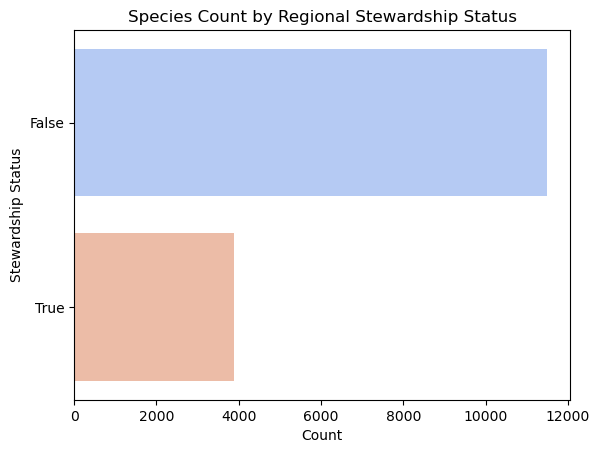

In [74]:
sns.countplot(data=final_df, y='Regional_Stewardship_Status', order=final_df['Regional_Stewardship_Status'].value_counts().index, palette='coolwarm')
plt.title("Species Count by Regional Stewardship Status")
plt.xlabel("Count")
plt.ylabel("Stewardship Status")
plt.show()

2.AOU Code Patterns

AOU_Code
NOCA    1125
CARW     993
REVI     738
ETTI     720
INBU     611
EAWP     574
FISP     492
RBWO     489
AMRO     470
ACFL     462
AMGO     457
CHSP     411
BGGN     404
CACH     366
MODO     359
Name: count, dtype: int64


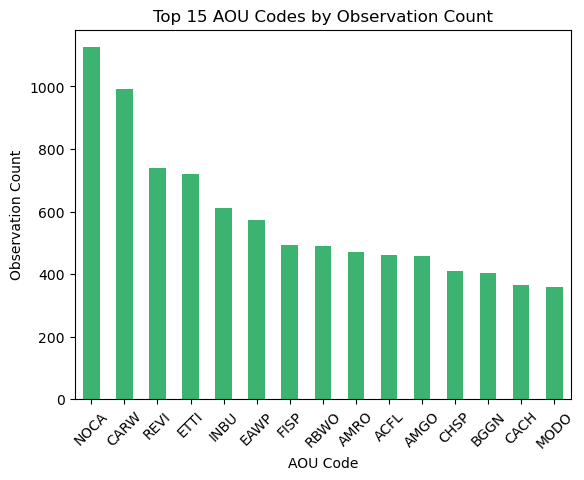

In [ ]:
final_df['AOU_Code'] =final_df['AOU_Code'].astype(str)  
aou_counts = final_df['AOU_Code'].value_counts().head(15)
print(aou_counts)
aou_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Top 15 AOU Codes by Observation Count")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()

In [76]:
final_df.head(2)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,Initial_Three_Min_Cnt,Sheet,Source,Wind_Speed_mph,Distance_num,Month,Season,Start_Hour,End_Hour,Distance_Num
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1,0-2.5 min,...,True,ANTI,Grassland,5.5,75.0,5,Spring,5,5,75.0
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,False,ANTI,Grassland,5.5,75.0,5,Spring,5,5,75.0


In [77]:
final_df.drop(columns=['Distance_num'], inplace=True)

In [78]:
final_df.head(2)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,Disturbance,Initial_Three_Min_Cnt,Sheet,Source,Wind_Speed_mph,Month,Season,Start_Hour,End_Hour,Distance_Num
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1,0-2.5 min,...,Slight effect on count,True,ANTI,Grassland,5.5,5,Spring,5,5,75.0
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,1900-01-01 05:35:00,1900-01-01 05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,Slight effect on count,False,ANTI,Grassland,5.5,5,Spring,5,5,75.0


In [79]:
!pip install mysql-connector-python

In [80]:
import mysql.connector

In [81]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    # port=3306
)

In [82]:
mycursor = mydb.cursor(buffered=True)

In [83]:
mycursor.execute("SHOW DATABASES")
print(mycursor)

CMySQLCursorBuffered: SHOW DATABASES


In [84]:
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('guvi',)
('information_schema',)
('mdtm40',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('practise',)
('project',)
('sportsradar',)
('test',)


In [85]:
mycursor.execute("USE project")

In [82]:
mycursor.execute("""CREATE TABLE bird_observations (
    Admin_Unit_Code VARCHAR(10),
    Plot_Name VARCHAR(20),
    Location_Type VARCHAR(20),
    Year INT,
    Date DATE,
    Start_Time TIME,
    End_Time TIME,
    Observer VARCHAR(100),
    Visit INT,
    Interval_Length VARCHAR(20),
    Initial_Three_Min_Cnt BOOLEAN,
    Sheet VARCHAR(20),
    Source VARCHAR(50),
    Wind_Speed_mph FLOAT,
    Month INT,
    Season VARCHAR(10),
    Start_Hour INT,
    End_Hour INT,
    Distance_Num FLOAT
)
 """)

In [ ]:

insert_df = final_df.copy()
insert_df = insert_df.where(insert_df.notnull(), None)


In [ ]:
insert_df = final_df.copy()
insert_df = insert_df.applymap(lambda x: None if pd.isna(x) else x)

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\1320142049.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  insert_df = insert_df.applymap(lambda x: None if pd.isna(x) else x)


In [ ]:
print(insert_df.isnull().sum())  

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Sheet                          0
Source                         0
Wind_Speed_mph                 0
Month                          0
Season                         0
Start_Hour

In [ ]:
for col in insert_df.columns:
    if insert_df[col].dtype == 'object': 
        insert_df[col].fillna("Unknown", inplace=True)
    else:
        insert_df[col].fillna(0, inplace=True)

C:\Users\brand\AppData\Local\Temp\ipykernel_19020\2745887199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insert_df[col].fillna("Unknown", inplace=True)
C:\Users\brand\AppData\Local\Temp\ipykernel_19020\2745887199.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [92]:
print((insert_df == 'nan').sum())

Admin_Unit_Code                0
Plot_Name                      0
Location_Type                  0
Year                           0
Date                           0
Start_Time                     0
End_Time                       0
Observer                       0
Visit                          0
Interval_Length                0
ID_Method                      0
Distance                       0
Flyover_Observed               0
Sex                            0
Common_Name                    0
Scientific_Name                0
AOU_Code                       0
PIF_Watchlist_Status           0
Regional_Stewardship_Status    0
Temperature                    0
Humidity                       0
Sky                            0
Wind                           0
Disturbance                    0
Initial_Three_Min_Cnt          0
Sheet                          0
Source                         0
Wind_Speed_mph                 0
Month                          0
Season                         0
Start_Hour

In [94]:
required_columns = [
    'Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
    'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
    'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name',
    'Scientific_Name', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
    'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
    'Initial_Three_Min_Cnt', 'Start_Hour', 'End_Hour', 'Distance_Num'
]

# Filter the DataFrame to include only these columns
insert_df_filtered = insert_df[required_columns]

In [96]:
mycursor.execute("DESCRIBE bird_observations")
for row in mycursor.fetchall():
    print(row)


('Admin_Unit_Code', 'varchar(10)', 'YES', '', None, '')
('Plot_Name', 'varchar(20)', 'YES', '', None, '')
('Location_Type', 'varchar(20)', 'YES', '', None, '')
('Year', 'int(11)', 'YES', '', None, '')
('Date', 'date', 'YES', '', None, '')
('Start_Time', 'time', 'YES', '', None, '')
('End_Time', 'time', 'YES', '', None, '')
('Observer', 'varchar(100)', 'YES', '', None, '')
('Visit', 'int(11)', 'YES', '', None, '')
('Interval_Length', 'varchar(20)', 'YES', '', None, '')
('Initial_Three_Min_Cnt', 'tinyint(1)', 'YES', '', None, '')
('Sheet', 'varchar(20)', 'YES', '', None, '')
('Source', 'varchar(50)', 'YES', '', None, '')
('Wind_Speed_mph', 'float', 'YES', '', None, '')
('Month', 'int(11)', 'YES', '', None, '')
('Season', 'varchar(10)', 'YES', '', None, '')
('Start_Hour', 'int(11)', 'YES', '', None, '')
('End_Hour', 'int(11)', 'YES', '', None, '')
('Distance_Num', 'float', 'YES', '', None, '')


In [97]:
required_columns = [
    'Admin_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date',
    'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length',
    'Initial_Three_Min_Cnt', 'Sheet', 'Source', 'Wind_Speed_mph',
    'Month', 'Season', 'Start_Hour', 'End_Hour', 'Distance_Num'
]

In [98]:
insert_df_filtered = insert_df[required_columns]

In [99]:
sql = """
INSERT INTO bird_observations (
    Admin_Unit_Code, Plot_Name, Location_Type, Year, Date,
    Start_Time, End_Time, Observer, Visit, Interval_Length,
    Initial_Three_Min_Cnt, Sheet, Source, Wind_Speed_mph,
    Month, Season, Start_Hour, End_Hour, Distance_Num
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
          %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [100]:
for _, row in insert_df_filtered.iterrows():
    mycursor.execute(sql, tuple(row))
mydb.commit()

In [101]:
rows_inserted = 0
for _, row in insert_df_filtered.iterrows():
    mycursor.execute(sql, tuple(row))
    rows_inserted += mycursor.rowcount

mydb.commit()
print(f"Total rows inserted: {rows_inserted}")

Total rows inserted: 15372
